# Test 2 SOM on Kepler and TESS Data

The second test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out a under-sampling to balance the dataset, with all the characteristics and initializing the weights of the SOM with 50% composed of values ​​of Planets taken randomly, and 50% False Planets.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [12]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [13]:
X_train = X_train.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns='Unnamed: 0')

In [14]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [15]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag']

In [16]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 17)
Shape of y_train: (10804, 1)


In [17]:
X_train = X_train.values
y_train = y_train.values

In [18]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  17


# Grid Search

In [19]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [1],
    'W_FALSE_PLANET': [1],
    'K': [7, 11]
}

In [20]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 15, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f3085ffeca0>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f3085ffeca0>,
# 'W_PLANET': 1, 'W_FALSE_PLANET': 1, 'K': 7}
# Best accuracy: 0.7653863951874132

Fitting 1 folds for each of 72 candidates, totalling 72 fits
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   41.047820
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   43.244301
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   49.777606
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   52.121219
SOM training completed:  10000  | QE:    0.000025  | LR:    0.000080  | NR:    1.000000  | Time:   43.550816
SOM training completed:  10000  | QE:    0.000029  | LR:    0.000080  | NR:    1.000000  | Time:   36.548503
SOM training completed:  10000  | QE:    0.000025  | LR:    0.000080  | NR:    1.000000  | Time:   45.068772
SOM training completed:  10000  | QE:    0.000029  | LR:    0.000080  | NR:    1.000000  | Time:   39.926802
SOM training completed:  10000  | QE:    0.000007  | LR:    0.00008

In [21]:
# best_param = {}
# best_param['W'] = None
# best_param['max_iter'] = 14000
# best_param['num_rows'] = 20
# best_param['num_cols'] = 20
# best_param['max_learning_rate'] = 0.8
# best_param['max_distance'] = 5
# best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
# best_param['distance_nr'] = DistanceMetrics.euclidean_distance
# best_param['W_PLANET'] = 1
# best_param['W_FALSE_PLANET'] = 1
# best_param['K'] = 5

In [22]:
W = best_param['W']
max_iter = 20000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [23]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000003  | LR:    0.800000  | NR:   10.000000  | Time:    0.012371
Iteration:  01000  | QE:    0.000009  | LR:    0.760040  | NR:   10.000000  | Time:    6.210566
Iteration:  02000  | QE:    0.000015  | LR:    0.720040  | NR:   10.000000  | Time:    5.822659
Iteration:  03000  | QE:    0.000006  | LR:    0.680040  | NR:    9.000000  | Time:    5.554914
Iteration:  04000  | QE:    0.000006  | LR:    0.640040  | NR:    9.000000  | Time:    5.555868
Iteration:  05000  | QE:    0.000010  | LR:    0.600040  | NR:    8.000000  | Time:    5.393267
Iteration:  06000  | QE:    0.000021  | LR:    0.560040  | NR:    8.000000  | Time:    5.376816
Iteration:  07000  | QE:    0.000005  | LR:    0.520040  | NR:    7.000000  | Time:    5.547047
Iteration:  08000  | QE:    0.000001  | LR:    0.480040  | NR:    7.000000  | Time:    6.576300
Iteration:  09000  | QE:    0.000005  | LR:    0.440040  | NR:    6.000000  | Time:    5.380869
Iteration:  10000  | QE:    0.000043  | 

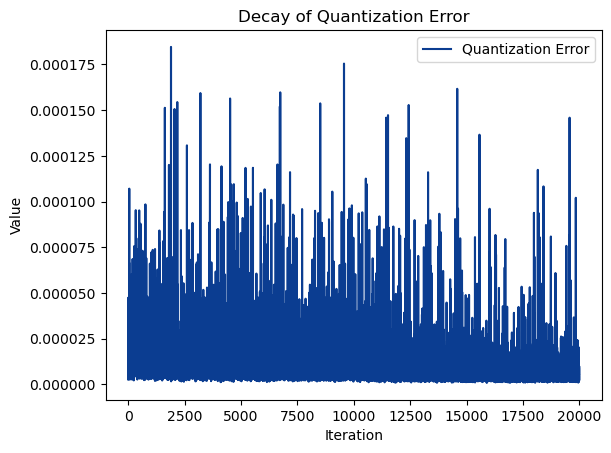

In [24]:
REDUCE = 1
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

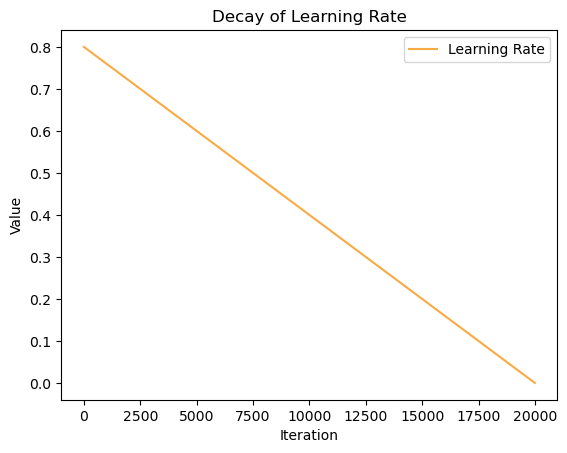

In [25]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

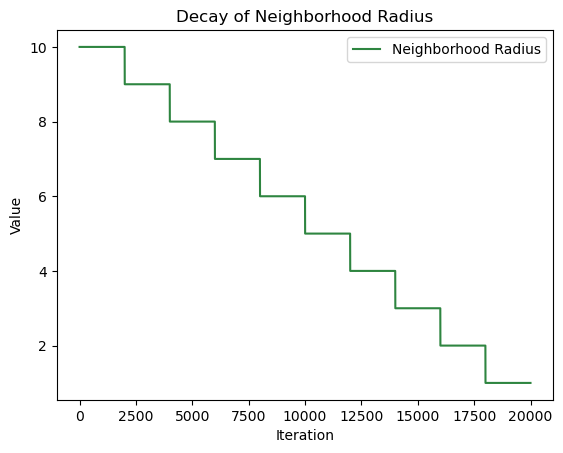

In [26]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

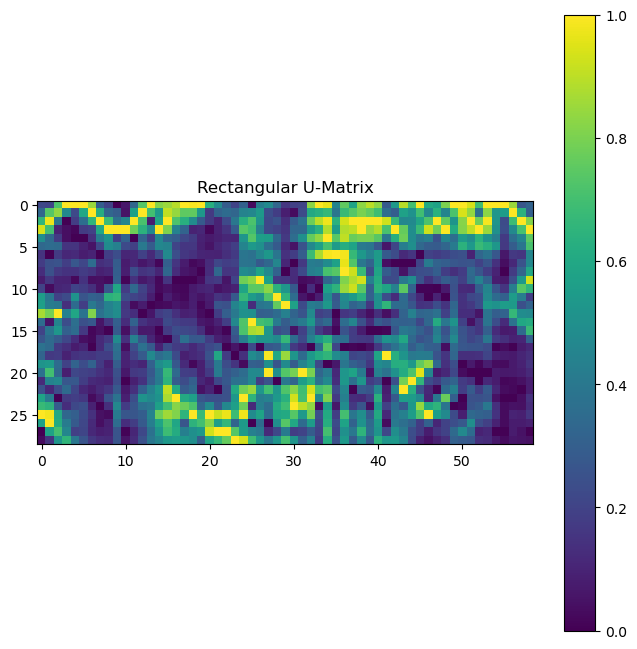

In [27]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

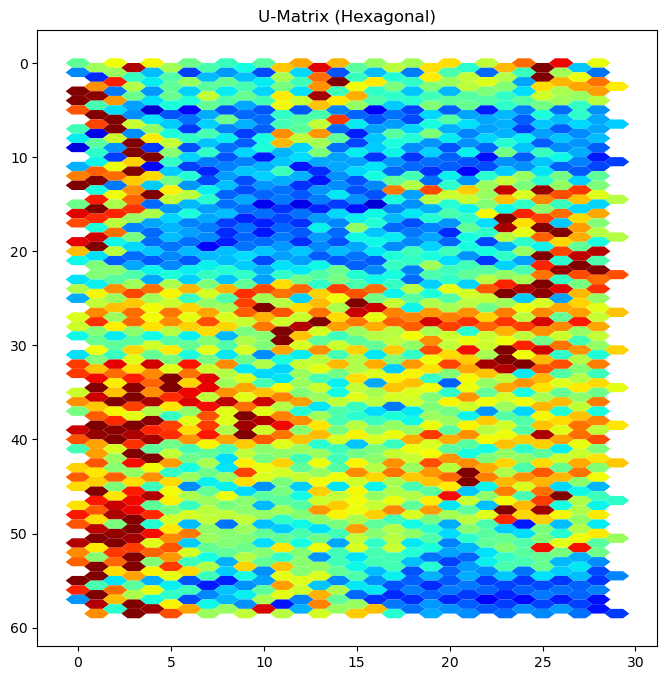

In [28]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

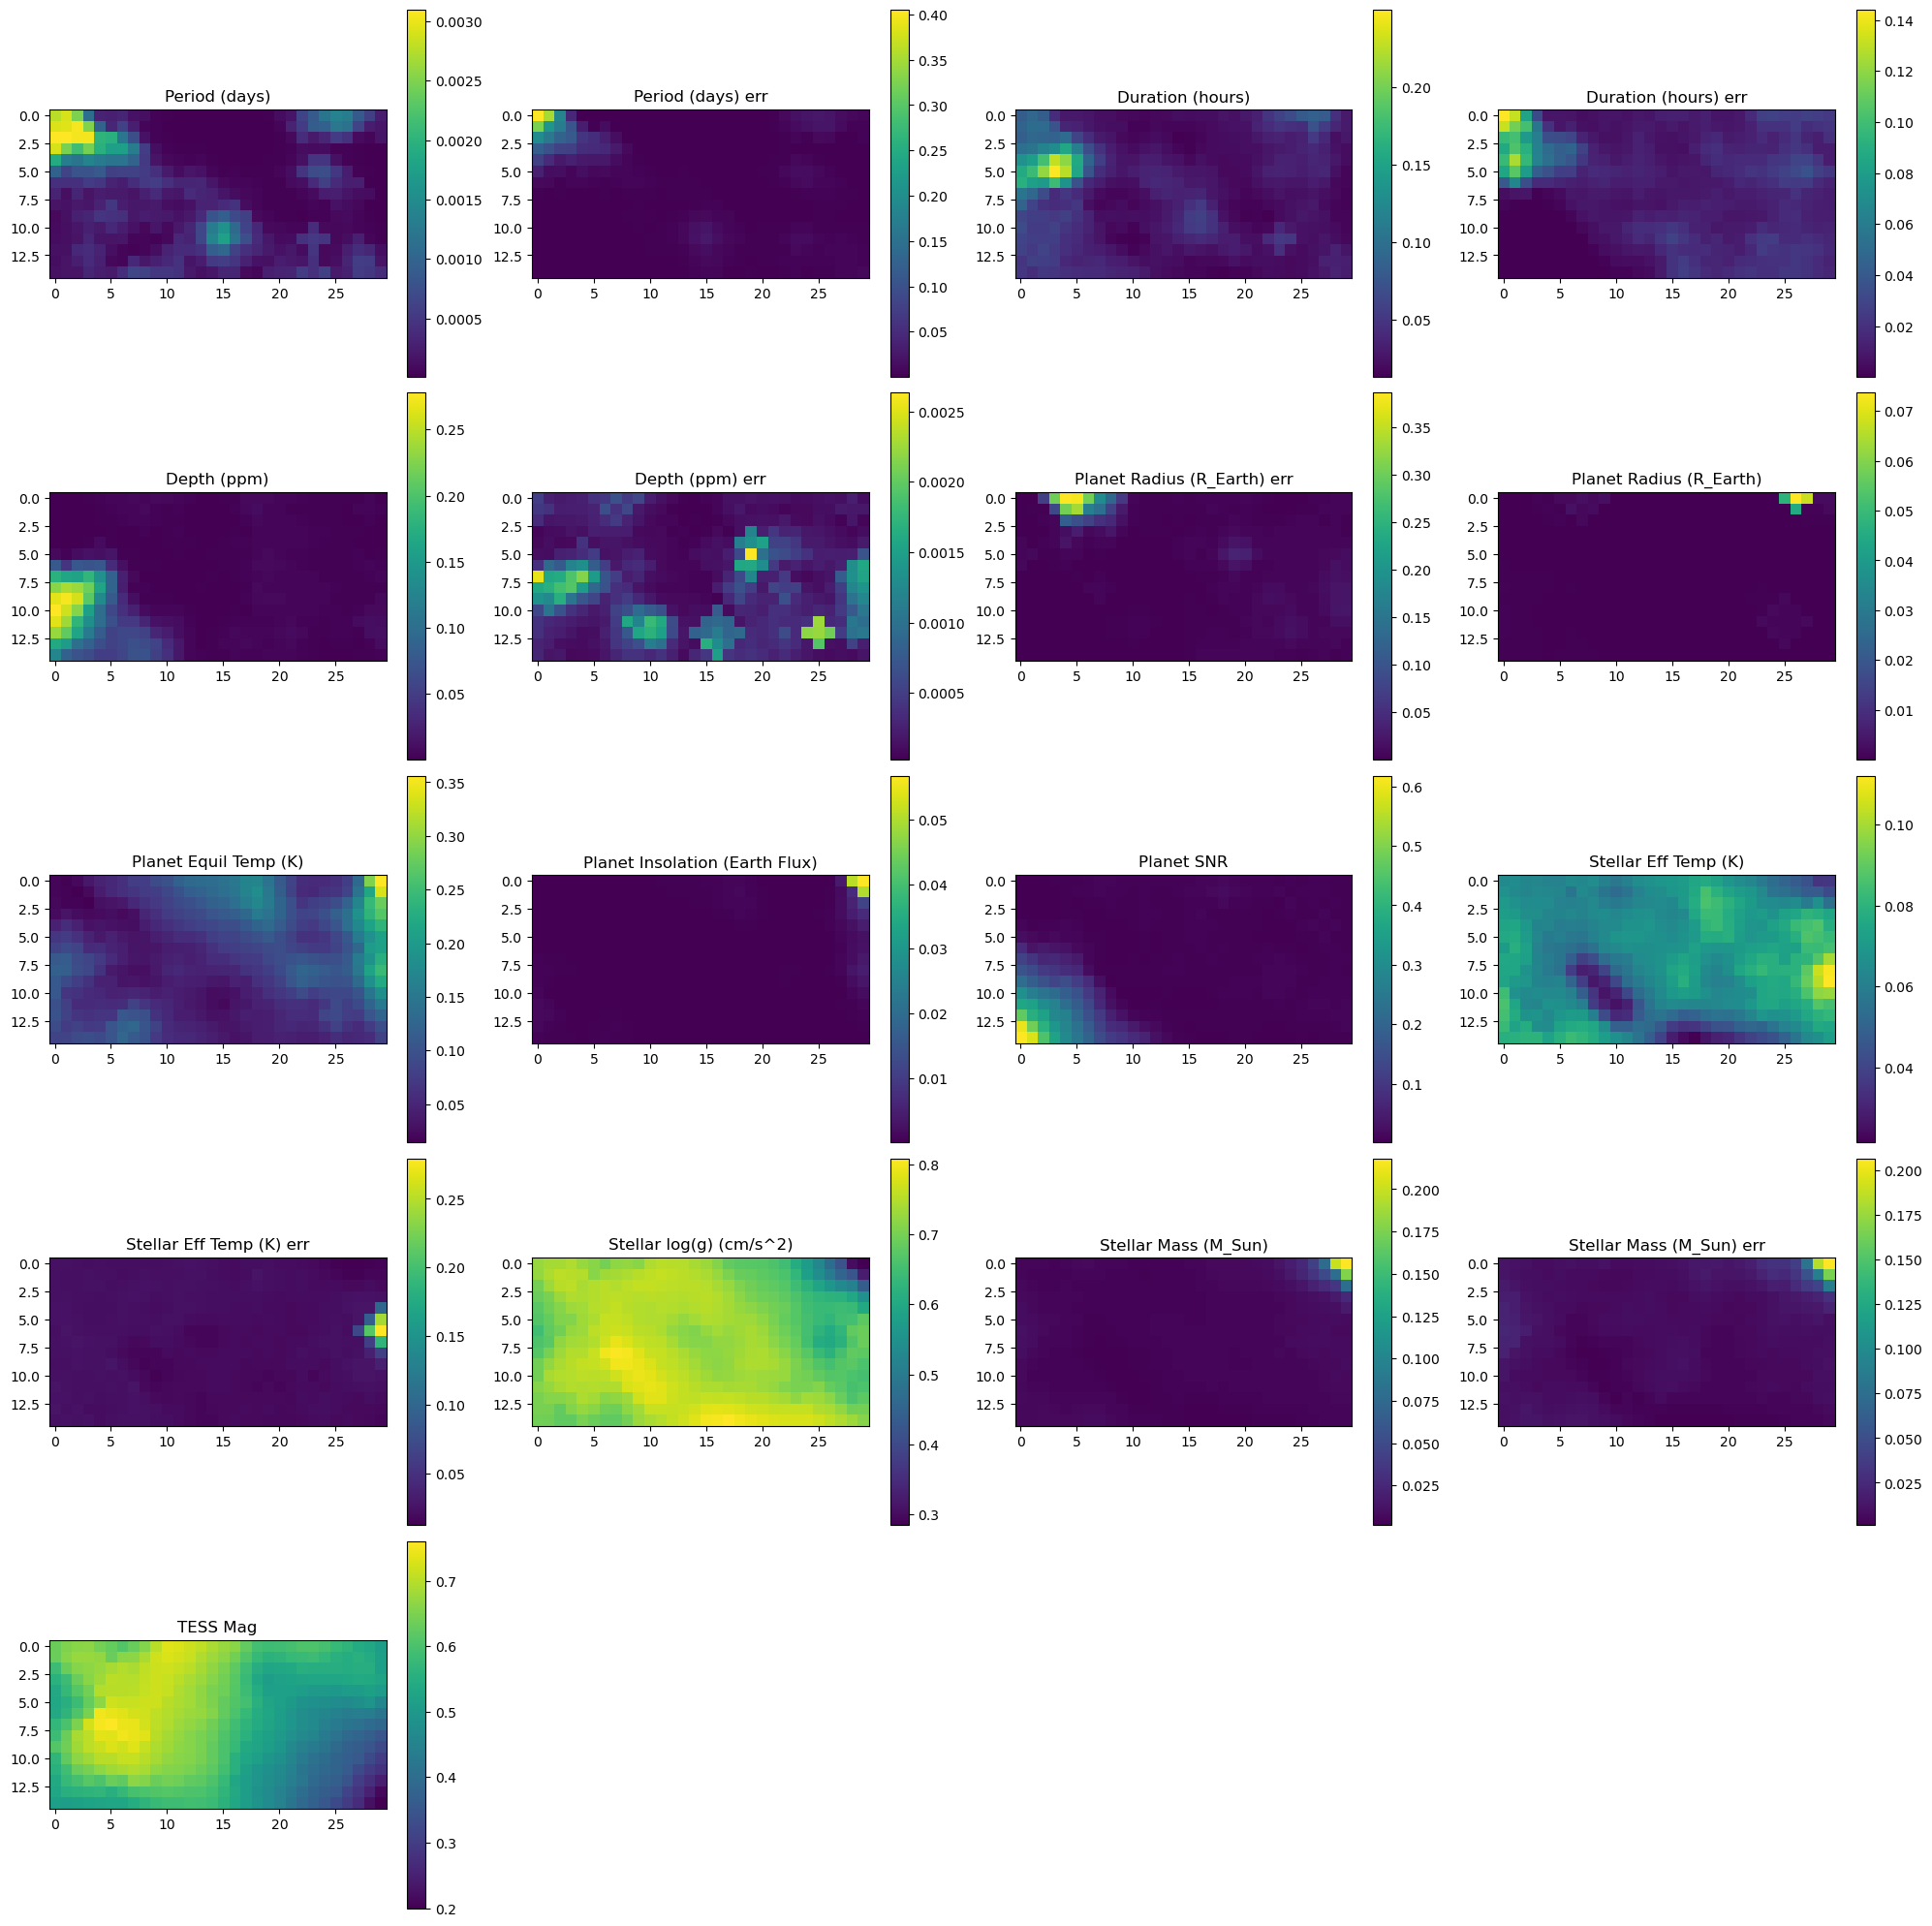

In [29]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [30]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(12, 0) -> Planet:   0, False Planet:  10
(0, 12) -> Planet:   0, False Planet:  31
(13, 21)-> Planet:  29, False Planet:   0
(12, 24)-> Planet:  29, False Planet:   0
(6, 14) -> Planet:  38, False Planet:   0
(14, 5) -> Planet:   0, False Planet:  13
(10, 5) -> Planet:   0, False Planet:  18
(8, 13) -> Planet:  47, False Planet:   0
(2, 13) -> Planet:   0, False Planet:  30
(2, 18) -> Planet:   0, False Planet:  16
(5, 3)  -> Planet:   0, False Planet:  23
(11, 23)-> Planet:  34, False Planet:   0
(5, 10) -> Planet:  14, False Planet:   0
(14, 7) -> Planet:   0, False Planet:  23
(9, 26) -> Planet:   0, False Planet:  27
(3, 0)  -> Planet:   0, False Planet:  46
(2, 22) -> Planet:   0, False Planet:  19
(5, 19) -> Planet:   7, False Planet:   0
(5, 21) -> Planet:  19, False Planet:   0
(11, 18)-> Planet:   0, False Planet:   6
(4, 13) -> Planet:  38, False Planet:   0
(1, 4)  -> Planet:   0, False Planet:  21
(14, 25)-> Planet:  27, False Planet:   0
(4, 10) -> Planet:  25, False Plan

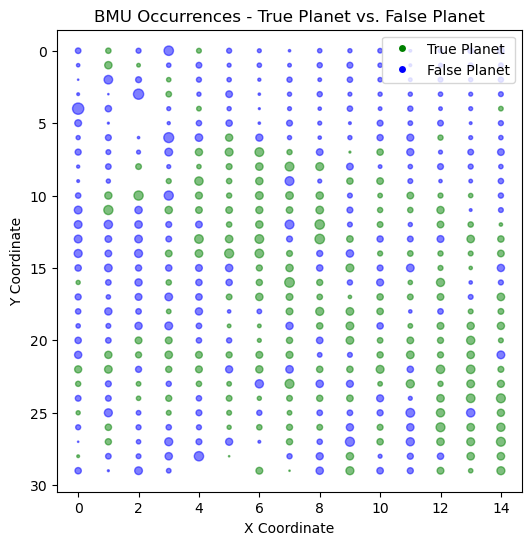

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [32]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

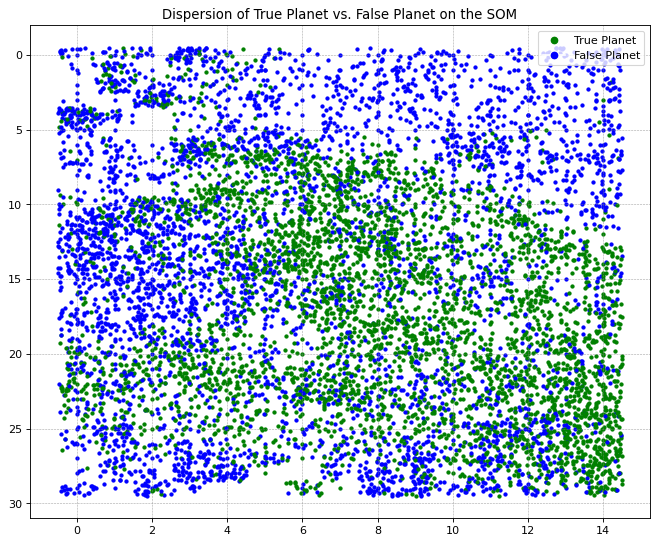

In [33]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

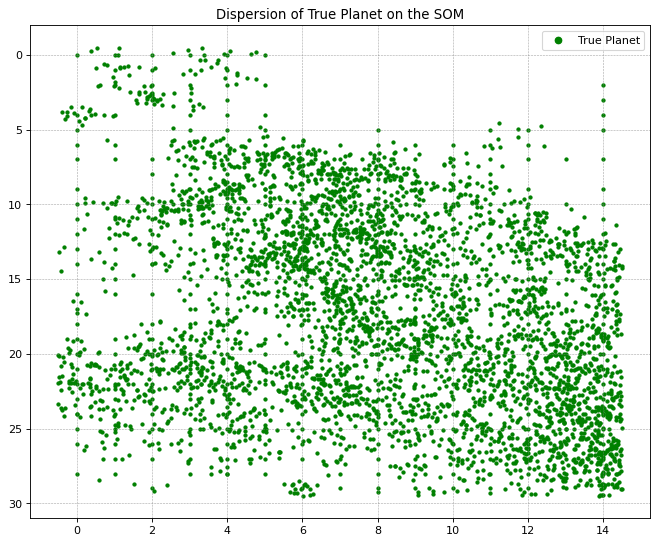

In [34]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

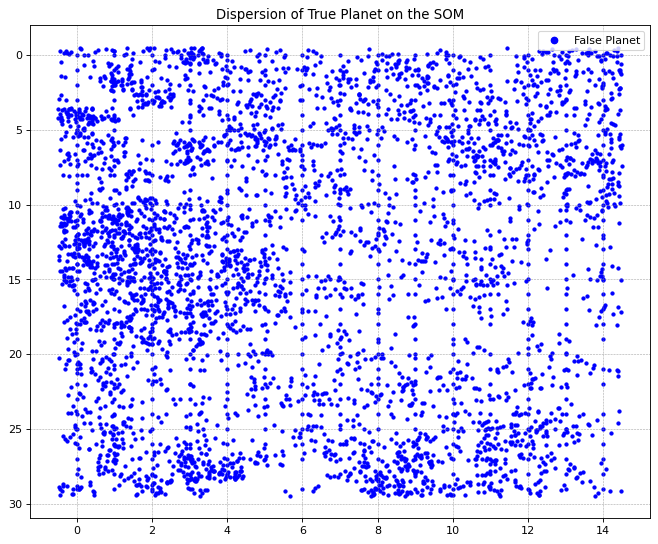

In [35]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

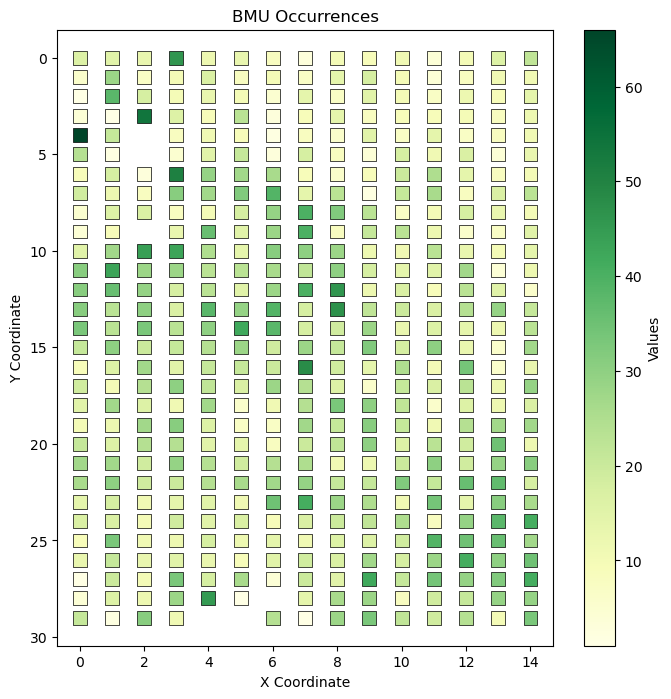

In [36]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

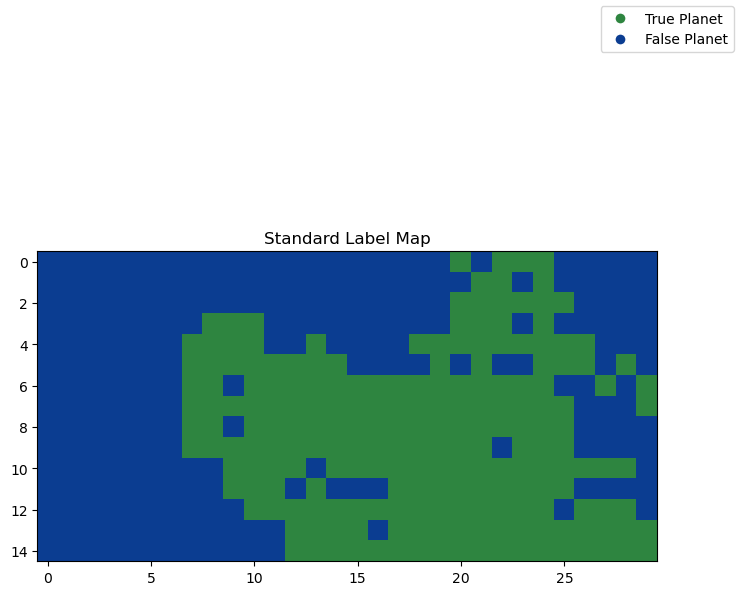

In [37]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

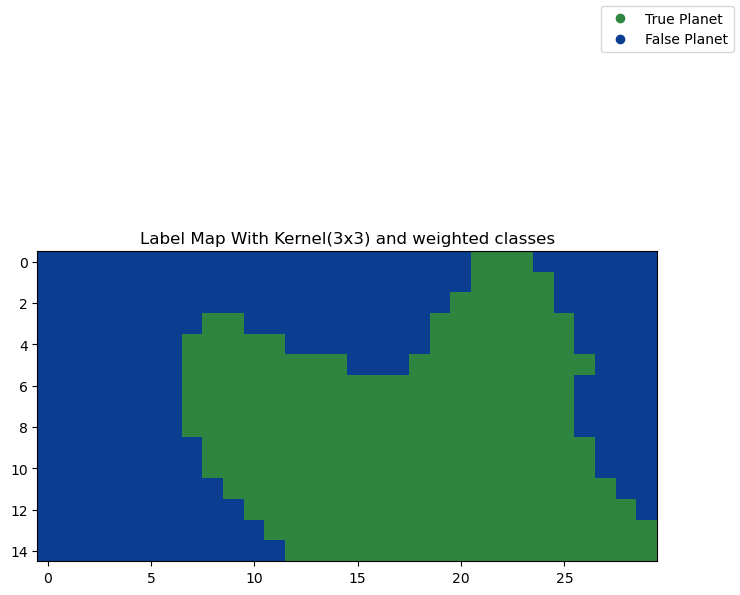

In [38]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

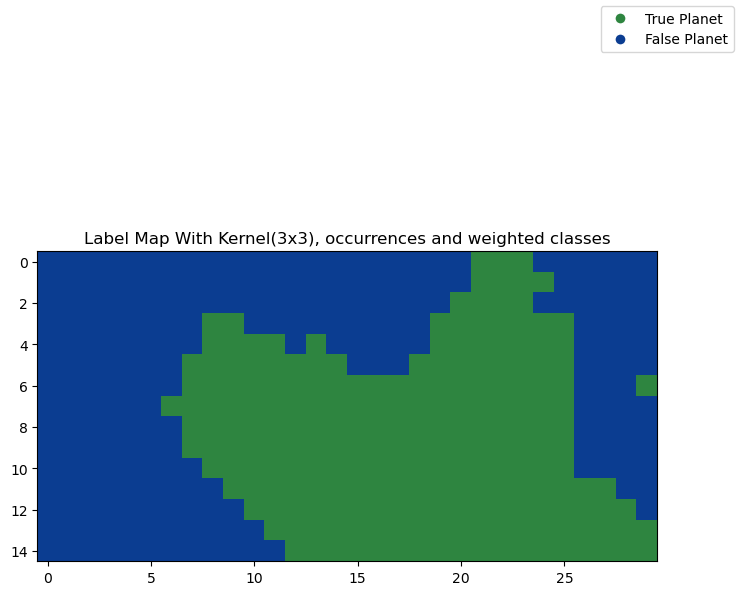

In [39]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

In [40]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

IndexError: index 17 is out of bounds for axis 0 with size 15

In [41]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

IndexError: index 17 is out of bounds for axis 0 with size 15

Accuracy: 0.7501156871818603
F1-score: 0.7696245733788396
Precision: 0.7041373926619828
Recall: 0.8485418626528692
cm:  [[719 379]
 [161 902]]


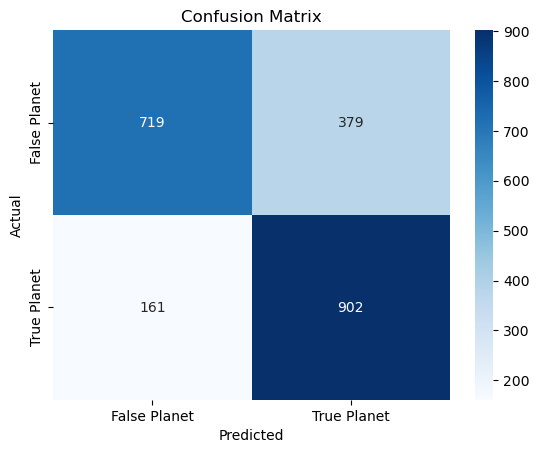

In [ ]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7510411846367423
F1-score: 0.7681034482758621
Precision: 0.7088305489260143
Recall: 0.8381937911571026
cm:  [[732 366]
 [172 891]]


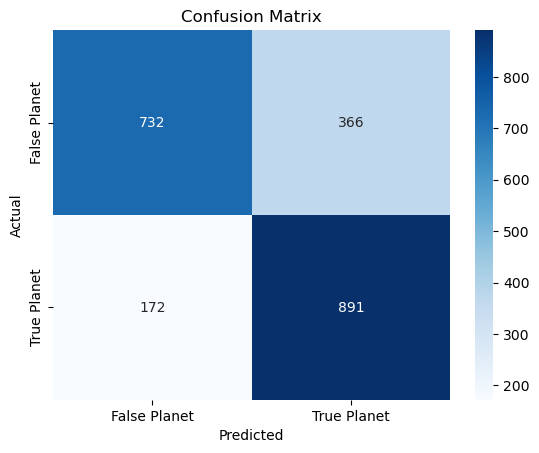

In [42]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)